In [13]:
import sys
import os
current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
from Plots import Centiles_plot, ROC_plot, cumulative_centiles_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, RocCurveDisplay, roc_auc_score , roc_curve, auc
from sklearn.calibration import CalibrationDisplay, calibration_curve




In [14]:
data = pd.read_csv('../data/derivatives/features_train1.csv')

In [15]:
X = data['distance_goal']
y = data['is_goal']
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
        )

In [16]:
# LogisticRegression prend des shape de (n,)
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
reshaped_X_val = X_val.values.reshape(-1,1)
reshaped_y_val = y_val.values.reshape(-1,1)

### Régression logistique entrainée sur la caractéristique 'Distance' uniquement

In [17]:
clf = LogisticRegression().fit(X_train, y_train)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Précsion du model

In [18]:
y_pred = clf.predict(reshaped_X_val)

# Calculer la précision du modèle
accuracy = accuracy_score(reshaped_y_val, y_pred)
print(accuracy)

0.9062459123610203


In [19]:
y_score = clf.predict_proba(reshaped_X_val)
print(y_score)
# la première colonne est la probabilité que le model ne prédit pas un but pour la ligne d'entrée correspondante
# la deuxieme colonne est la probabilté que le model ne prédit un but pour la ligne d'entrée correspondante

[[0.96612945 0.03387055]
 [0.81085416 0.18914584]
 [0.81446129 0.18553871]
 ...
 [0.8002089  0.1997911 ]
 [0.89720899 0.10279101]
 [0.91438653 0.08561347]]


AUC metric : 0.696479560582925


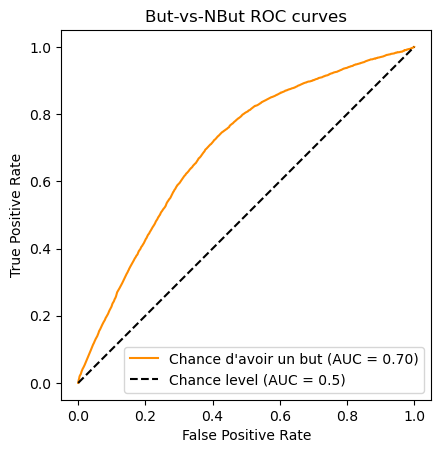

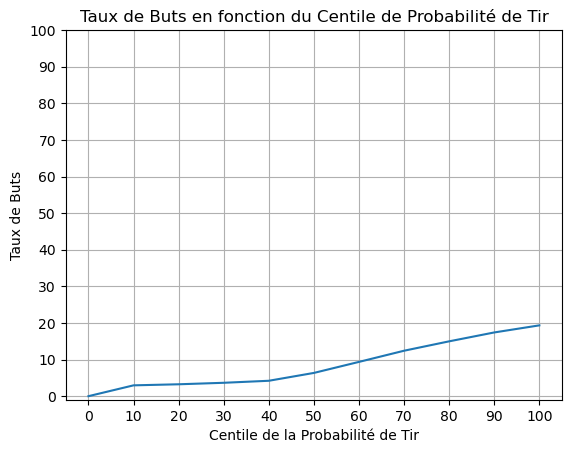

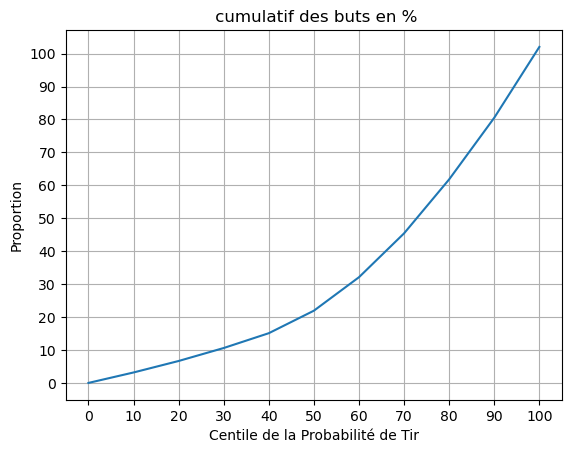

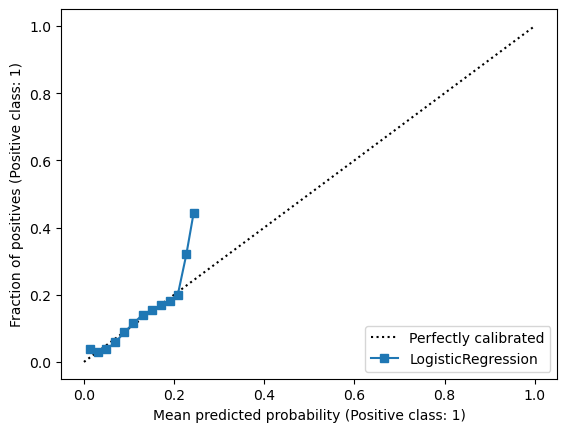

In [29]:
# on s'intéresse à la deuxième colonne y_score[:,1] qui représente la probabilité de prédire un but

# Receiver Operating Characteristic
ROC_plot(y_val, y_score[:,1])

# Taux de buts
Centiles_plot(y_val, y_score[:,1])

# Cumule de buts
cumulative_centiles_plot(y_val, y_score[:,1])

# Courbe de calibration
CalibrationDisplay.from_estimator(clf,reshaped_X_val, reshaped_y_val, n_bins=50)

### Régression logisrique entrainnée sur la caractéristique 'Angle' uniquement

In [21]:
X_1 = data['angle_goal']
X1_train, X1_val, y1_train, y1_val = train_test_split(
        X_1, y, test_size=0.2, random_state=42
        )

X1_train = X1_train.values.reshape(-1,1)
y1_train = y1_train.values.reshape(-1,1)
reshaped_X1_val = X1_val.values.reshape(-1,1)
reshaped_y1_val = y1_val.values.reshape(-1,1)

clf_1 = LogisticRegression().fit(X1_train, y1_train)

y1_score = clf_1.predict_proba(reshaped_X1_val)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC metric : 0.5020579700966246


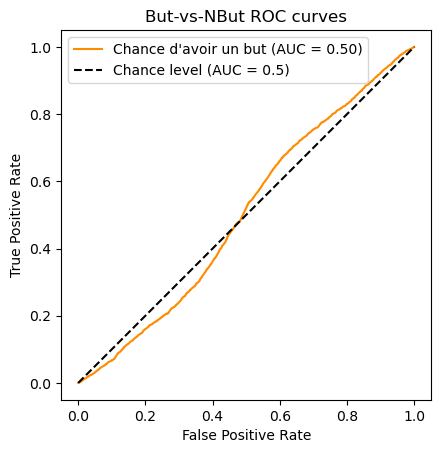

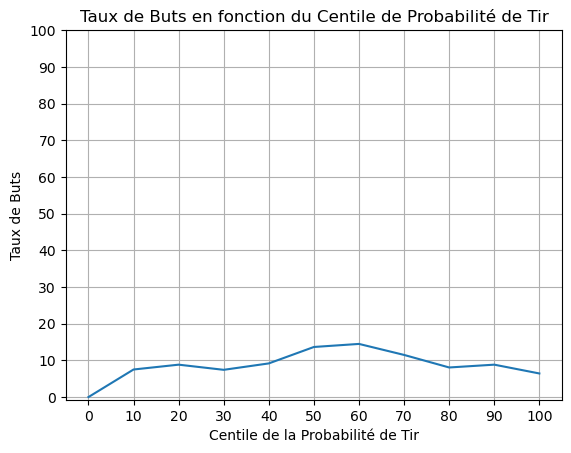

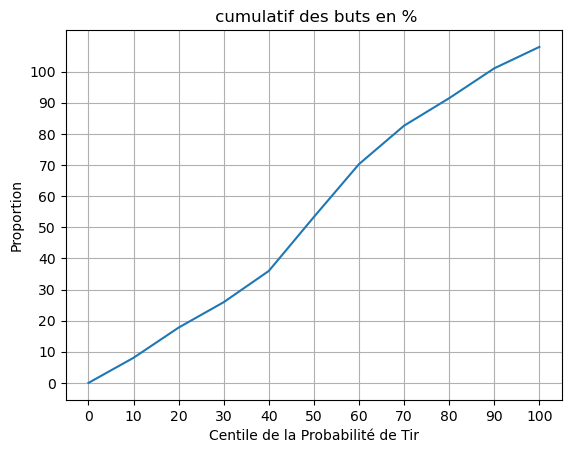

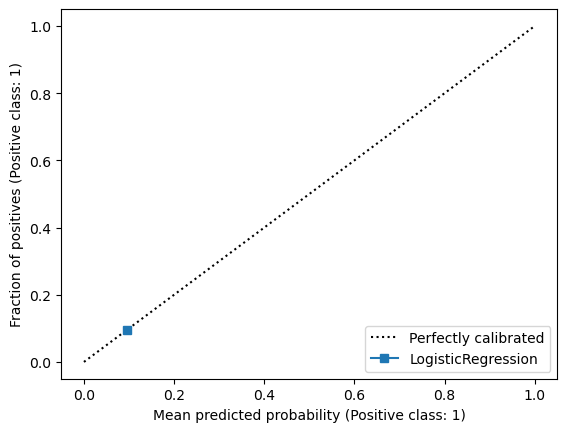

In [30]:

# Receiver Operating Characteristic
ROC_plot (y1_val, y1_score[:,1])

# Taux de buts
Centiles_plot(y1_val, y1_score[:,1])

# Cumule de buts
cumulative_centiles_plot(y1_val, y1_score[:,1])

# Courbe de calibration
CalibrationDisplay.from_estimator(clf_1,reshaped_X1_val, reshaped_y1_val, n_bins=50)

### Régression logistique entrainée sur les caractéristique 'distance' et 'Angle' 

In [23]:
X_2 = data[['distance_goal','angle_goal']]
X2_train, X2_val, y2_train, y2_val = train_test_split(
        X_2, y, test_size=0.2, random_state=42
        )
y2_train = y2_train.values.reshape(-1,1)
reshaped_y2_val = y2_val.values.reshape(-1,1)
clf_2 = LogisticRegression().fit(X2_train, y2_train)
y2_score = clf_2.predict_proba(X2_val)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC metric : 0.6964502052410217


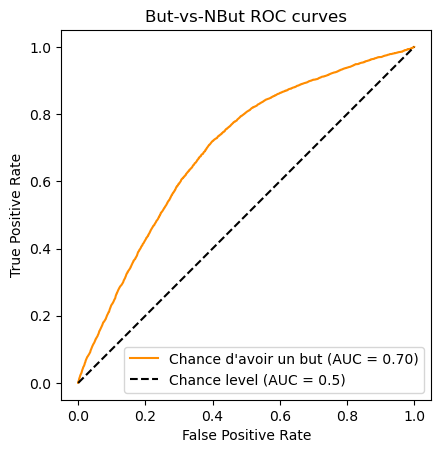

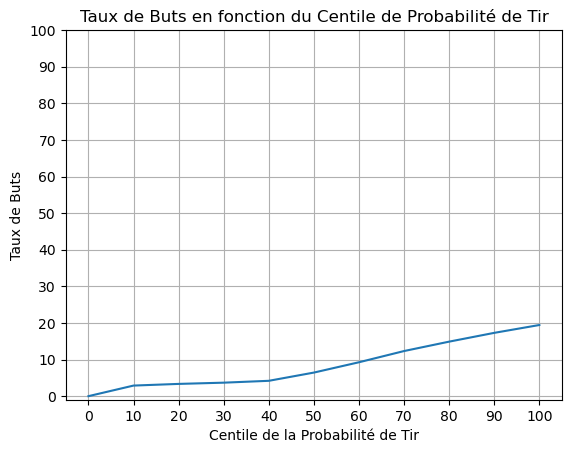

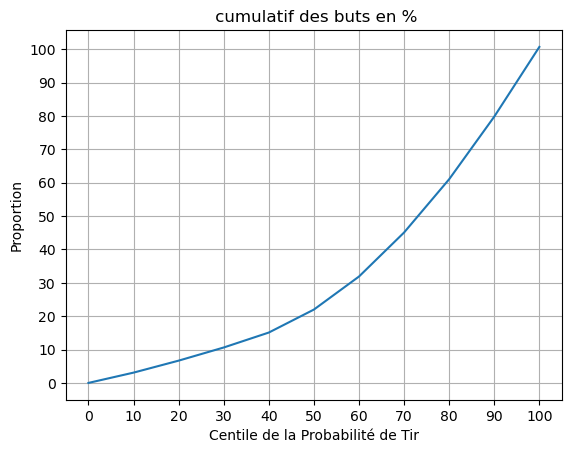

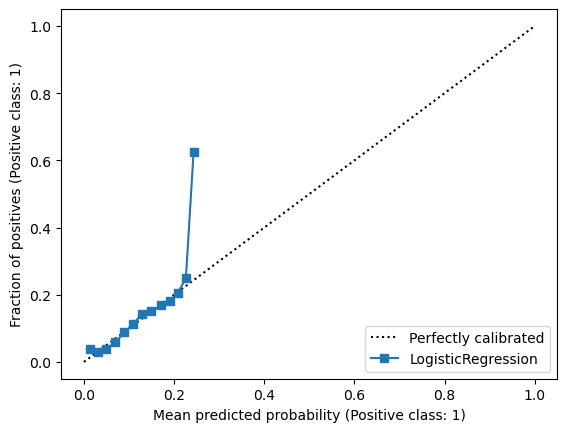

In [28]:
# Receiver Operating Characteristic
ROC_plot (y2_val, y2_score[:,1])

#Taux de buts
Centiles_plot(y2_val, y2_score[:,1])

# Cumule de buts
cumulative_centiles_plot(y2_val, y2_score[:,1])

# Courbe de calibration
CalibrationDisplay.from_estimator(clf_2,X2_val, reshaped_y2_val, n_bins=50)

### Régression logistique avec échantillonage uniforme

AUC metric : 0.500210356613709


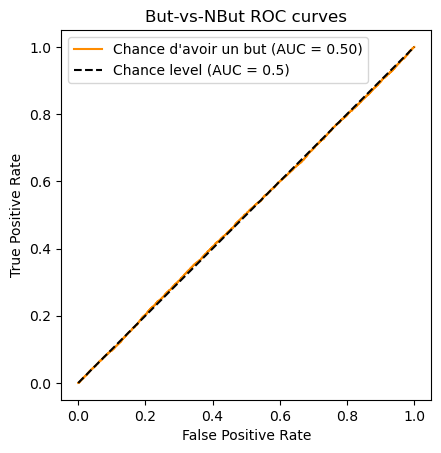

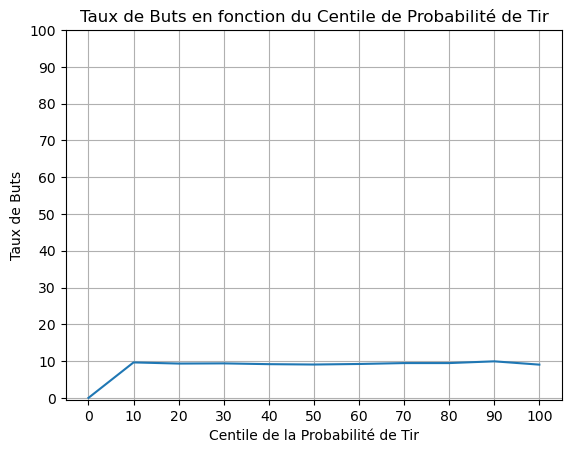

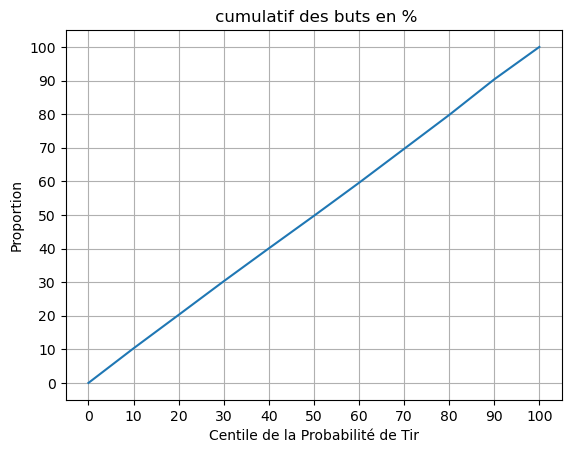

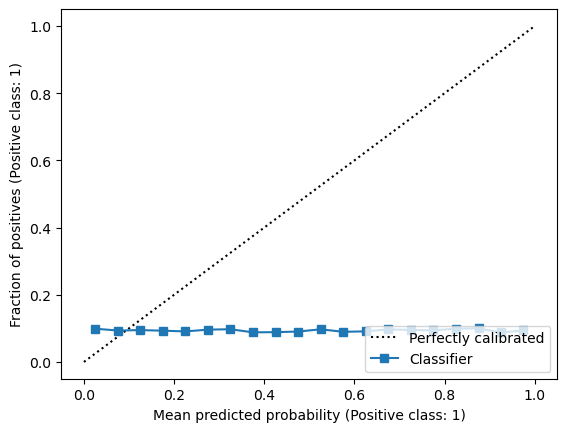

In [25]:
# Échantillonnage des probabilités prédites à partir d'une distribution uniforme U(0, 1)

y_uniform_sampled = np.random.uniform(0, 1, len(y2_score[:,1]))

# Receiver Operating Characteristic
ROC_plot (y2_val, y_uniform_sampled)

#Taux de buts
Centiles_plot(y2_val, y_uniform_sampled)

# Cumule de buts
cumulative_centiles_plot(y2_val, y_uniform_sampled)

# Courbe de calibration
CalibrationDisplay.from_predictions(y2_val, y_uniform_sampled, n_bins=20)